In [ ]:
pip install yfinance

In [ ]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta

In [ ]:
#define the time period for the data
end_date=date.today().strftime("%Y-%m-%d")
start_date=(date.today()-timedelta(days=365)).strftime("%Y-%m-%d")



In [ ]:
#list of stock tickers to download
tickers=['RELIANCE.NS','TCS.NS','INFY.NS','HDFCBANK.NS']


In [ ]:
data=yf.download(tickers,start=start_date,end=end_date,progress=False)


In [ ]:
data=data.reset_index()


In [ ]:
data_melted=data.melt(id_vars=['Date'],var_name=['Attribute','Ticker'])
data


Price        Date    Adj Close                                         \
Ticker             HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS   
0      2023-07-24  1655.789429  1312.125488  2478.644287  3338.298340   
1      2023-07-25  1673.744263  1310.162231  2477.050049  3342.624756   
2      2023-07-26  1667.923706  1324.151245  2517.307617  3331.955566   
3      2023-07-27  1650.610229  1328.372559  2493.890381  3340.412354   
4      2023-07-28  1621.359619  1315.954224  2518.952148  3299.602539   
..            ...          ...          ...          ...          ...   
238    2024-07-15  1622.099976  1707.050049  3194.449951  4159.539551   
239    2024-07-16  1619.750000  1726.050049  3152.500000  4168.768066   
240    2024-07-18  1614.800049  1758.050049  3173.350098  4305.549805   
241    2024-07-19  1607.300049  1792.949951  3110.300049  4302.399902   
242    2024-07-22  1642.550049  1810.849976  3001.350098  4287.350098   

Price         Close                                                High  ...  \
Ticker  HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS  HDFCBANK.NS  ...   
0       1678.400024  1336.599976  2487.399902  3394.750000  1684.650024  ...   
1       1696.599976  1334.599976  2485.800049  3399.149902  1699.000000  ...   
2       1690.699951  1348.849976  2526.199951  3388.300049  1699.599976  ...   
3       1673.150024  1353.150024  2502.699951  3396.899902  1703.000000  ...   
4       1643.500000  1340.500000  2527.850098  3355.399902  1668.900024  ...   
..              ...          ...          ...          ...          ...  ...   
238     1622.099976  1707.050049  3194.449951  4169.200195  1629.800049  ...   
239     1619.750000  1726.050049  3152.500000  4178.450195  1627.000000  ...   
240     1614.800049  1758.050049  3173.350098  4315.549805  1623.949951  ...   
241     1607.300049  1792.949951  3110.300049  4302.399902  1623.000000  ...   
242     1642.550049  1810.849976  3001.350098  4287.350098  1651.000000  ...   

Price           Low                      Open                            \
Ticker  RELIANCE.NS       TCS.NS  HDFCBANK.NS      INFY.NS  RELIANCE.NS   
0       2469.300049  3372.100098  1678.500000  1341.000000  2481.000000   
1       2480.000000  3380.199951  1684.650024  1337.000000  2494.000000   
2       2485.000000  3385.000000  1699.599976  1343.000000  2485.000000   
3       2490.350098  3385.050049  1699.900024  1358.599976  2534.050049   
4       2500.550049  3331.000000  1661.500000  1353.849976  2512.050049   
..              ...          ...          ...          ...          ...   
238     3171.000000  4157.049805  1623.500000  1726.199951  3208.899902   
239     3138.250000  4144.899902  1620.750000  1718.599976  3187.000000   
240     3115.649902  4160.000000  1608.000000  1719.000000  3152.000000   
241     3105.600098  4285.250000  1616.000000  1844.000000  3172.000000   
242     2998.550049  4265.000000  1617.000000  1800.150024  3074.500000   

Price                    Volume                                 
Ticker       TCS.NS HDFCBANK.NS   INFY.NS RELIANCE.NS   TCS.NS  
0       3381.000000    16089722   8859789    11863933  1680132  
1       3397.500000    27996298   6801982     6013010  1272980  
2       3400.350098    12397179   5528885     6455506  1066803  
3       3394.949951    29870651   9191861     8613449  1701769  
4       3385.000000    20507842   6122735    10413926  2599831  
..              ...         ...       ...         ...      ...  
238     4235.700195    16687847   6942230     2664844  4848030  
239     4172.000000    14475162   6886281     4693419  2029521  
240     4160.000000    16858532  11248896     6149187  5613364  
241     4317.399902    13001076  29819116     6570195  3903354  
242     4299.950195    26872411   8462126     9837188  1896386  

[243 rows x 25 columns]

In [ ]:
data_pivoted=data_melted.pivot_table(index=['Date','Ticker'],columns='Attribute',values='value',aggfunc='first')

In [ ]:
stock_data=data_pivoted.reset_index()

In [ ]:
print(stock_data.head())


Attribute       Date       Ticker    Adj Close        Close         High  \
0         2023-07-24  HDFCBANK.NS  1655.789429  1678.400024  1684.650024   
1         2023-07-24      INFY.NS  1312.125488  1336.599976  1349.900024   
2         2023-07-24  RELIANCE.NS  2478.644287  2487.399902  2514.949951   
3         2023-07-24       TCS.NS  3338.298340  3394.750000  3413.449951   
4         2023-07-25  HDFCBANK.NS  1673.744263  1696.599976  1699.000000   

Attribute          Low         Open      Volume  
0          1670.099976  1678.500000  16089722.0  
1          1334.250000  1341.000000   8859789.0  
2          2469.300049  2481.000000  11863933.0  
3          3372.100098  3381.000000   1680132.0  
4          1678.400024  1684.650024  27996298.0  


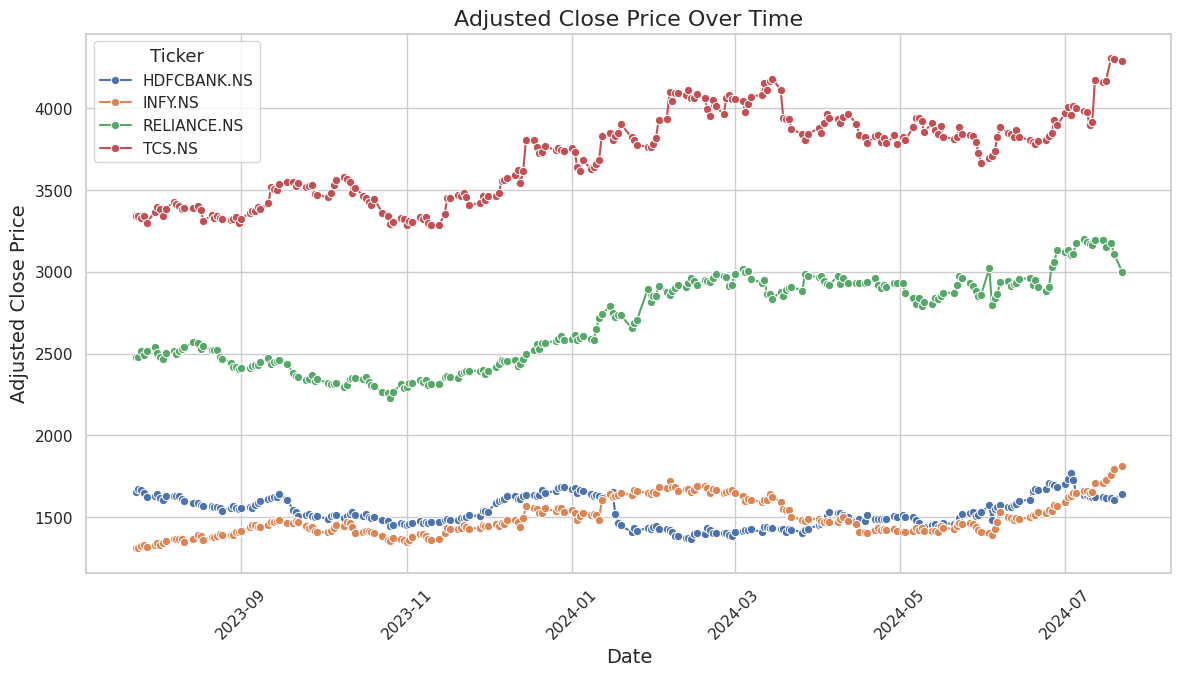

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

stock_data['Date']=pd.to_datetime(stock_data['Date'])

stock_data.set_index('Date',inplace=True)
stock_data.reset_index(inplace=True)
plt.figure(figsize=(14,7))
sns.set(style='whitegrid')

sns.lineplot(data=stock_data,x='Date',y='Adj Close', hue='Ticker',marker='o')

plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price',fontsize=14)
plt.legend(title='Ticker',title_fontsize='13',fontsize='11')
plt.grid(True)

plt.xticks(rotation=45)
plt.show()


# New Section

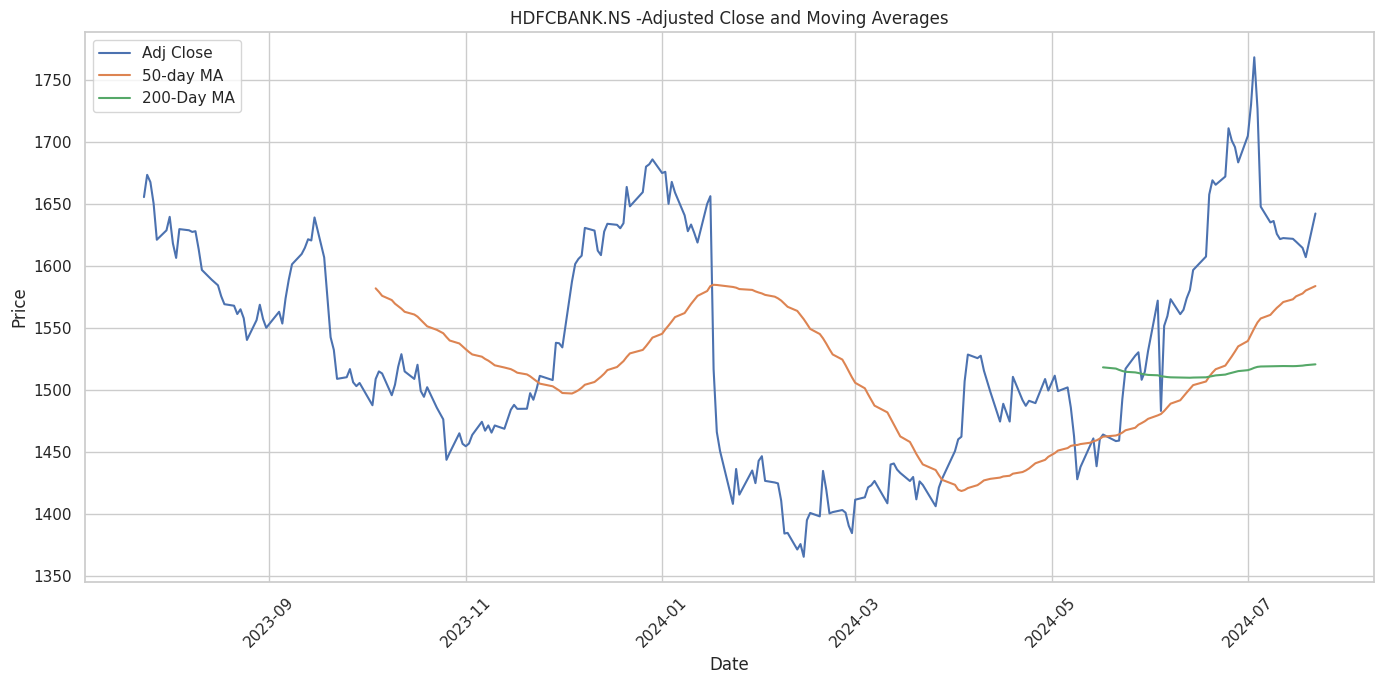

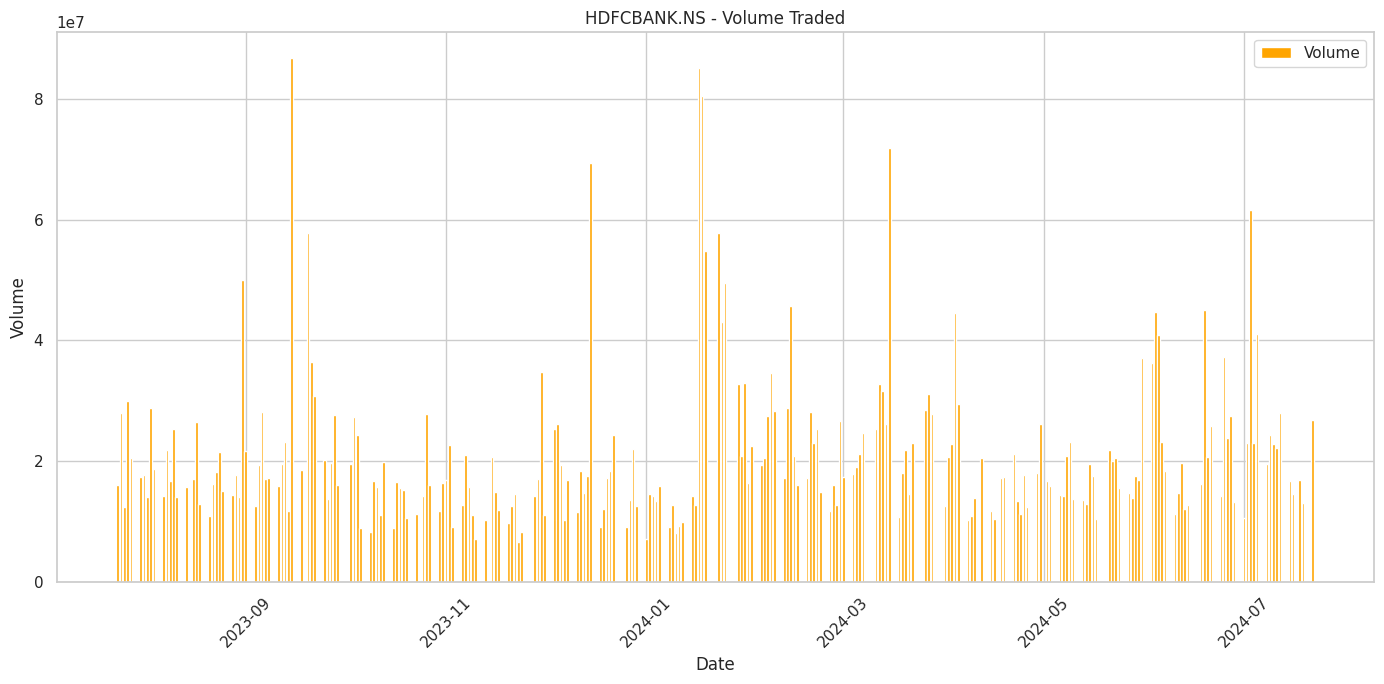

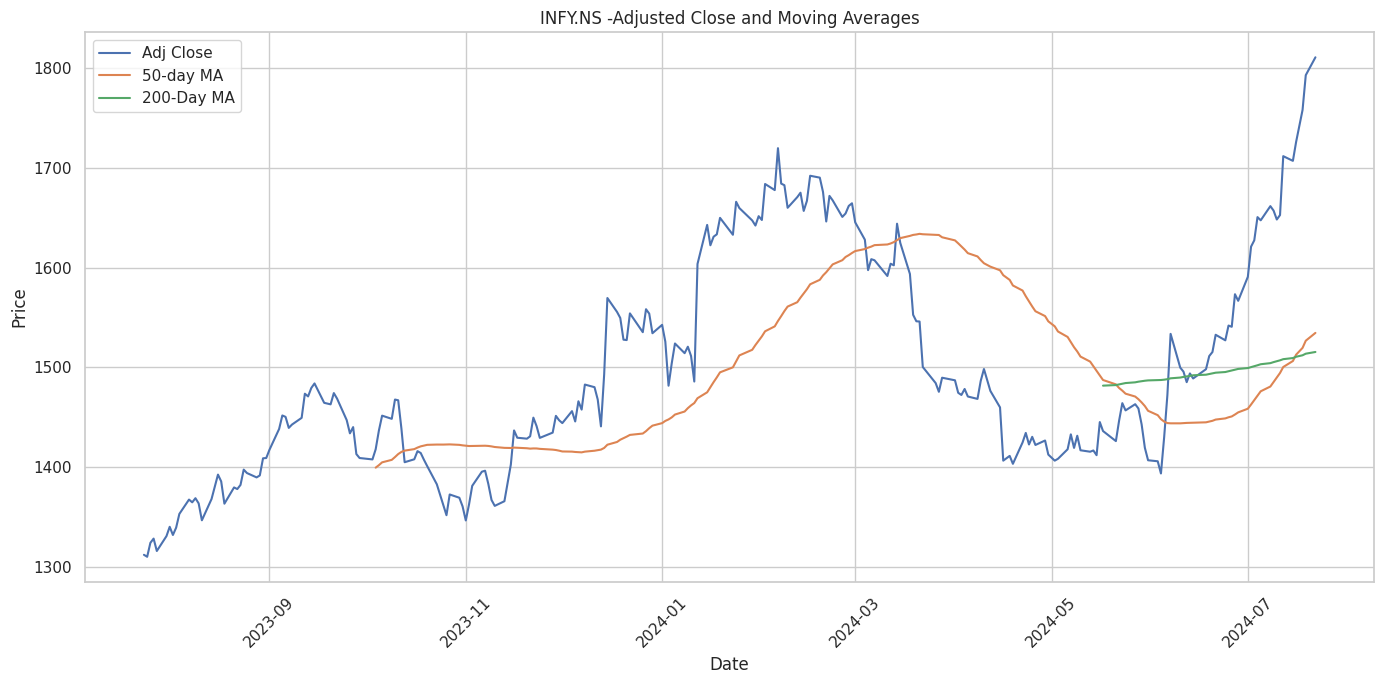

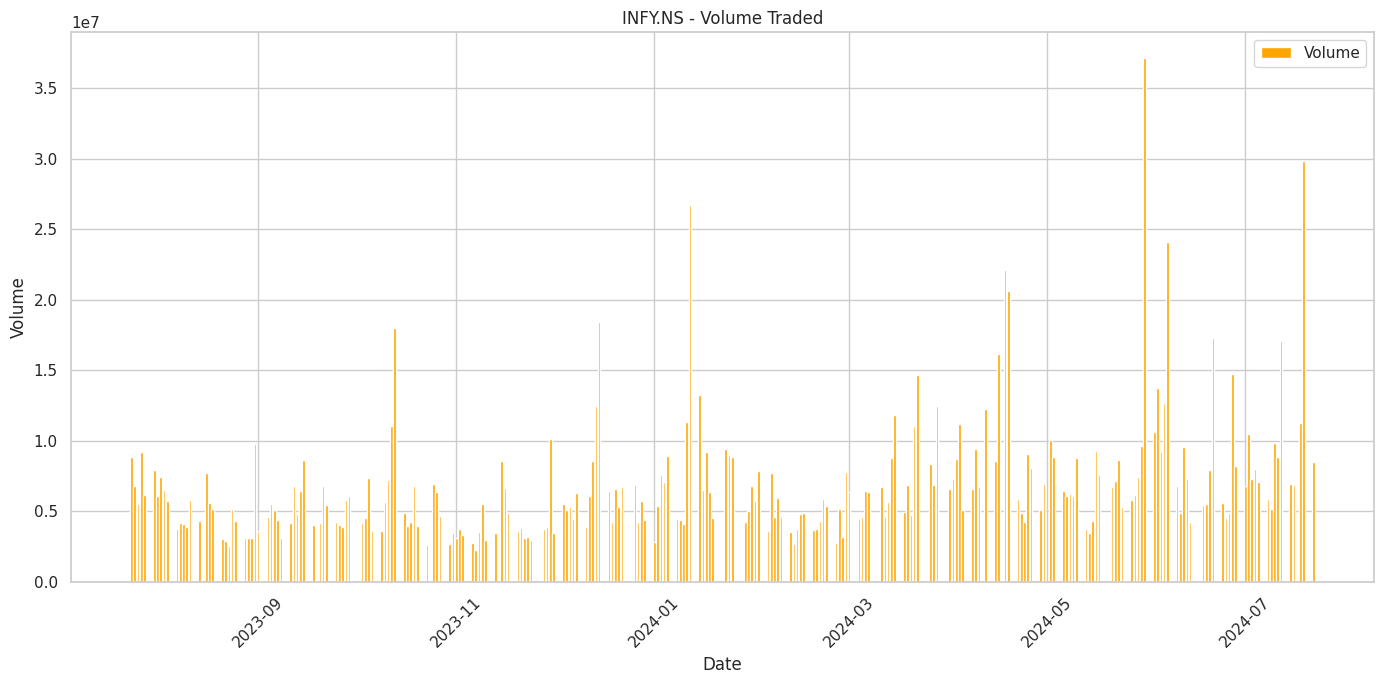

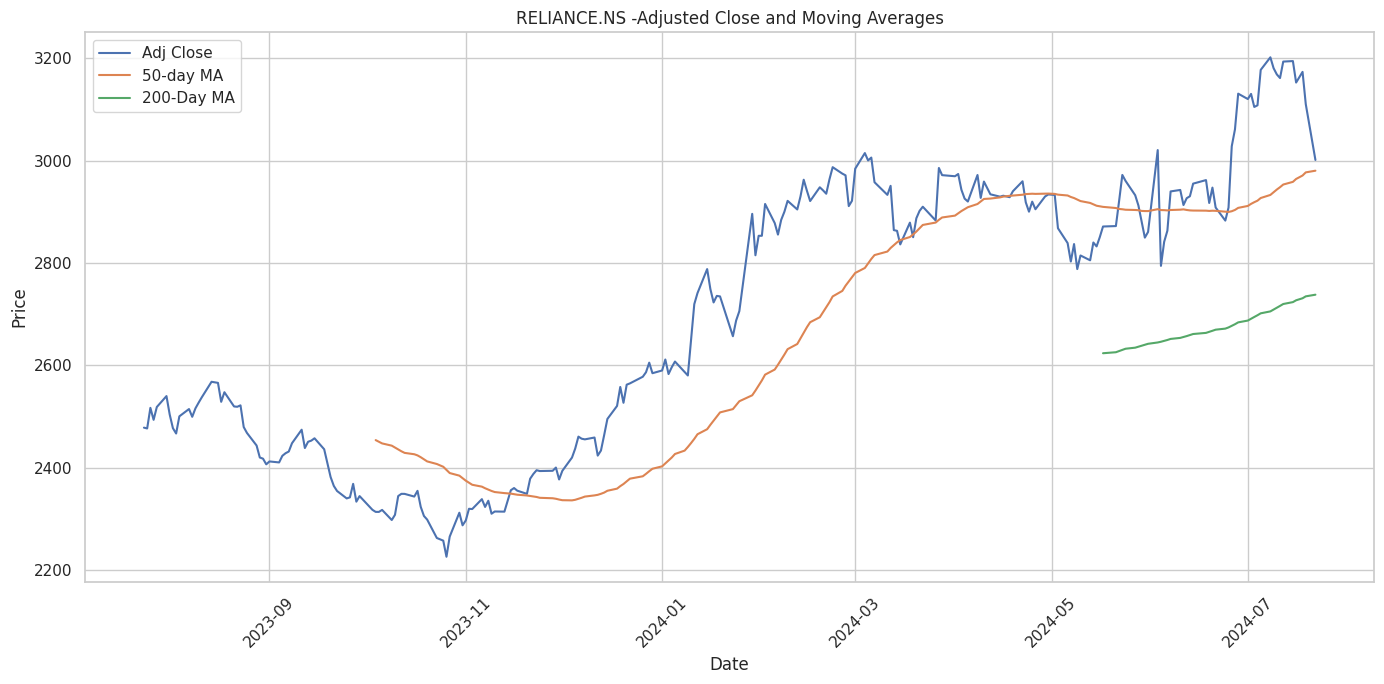

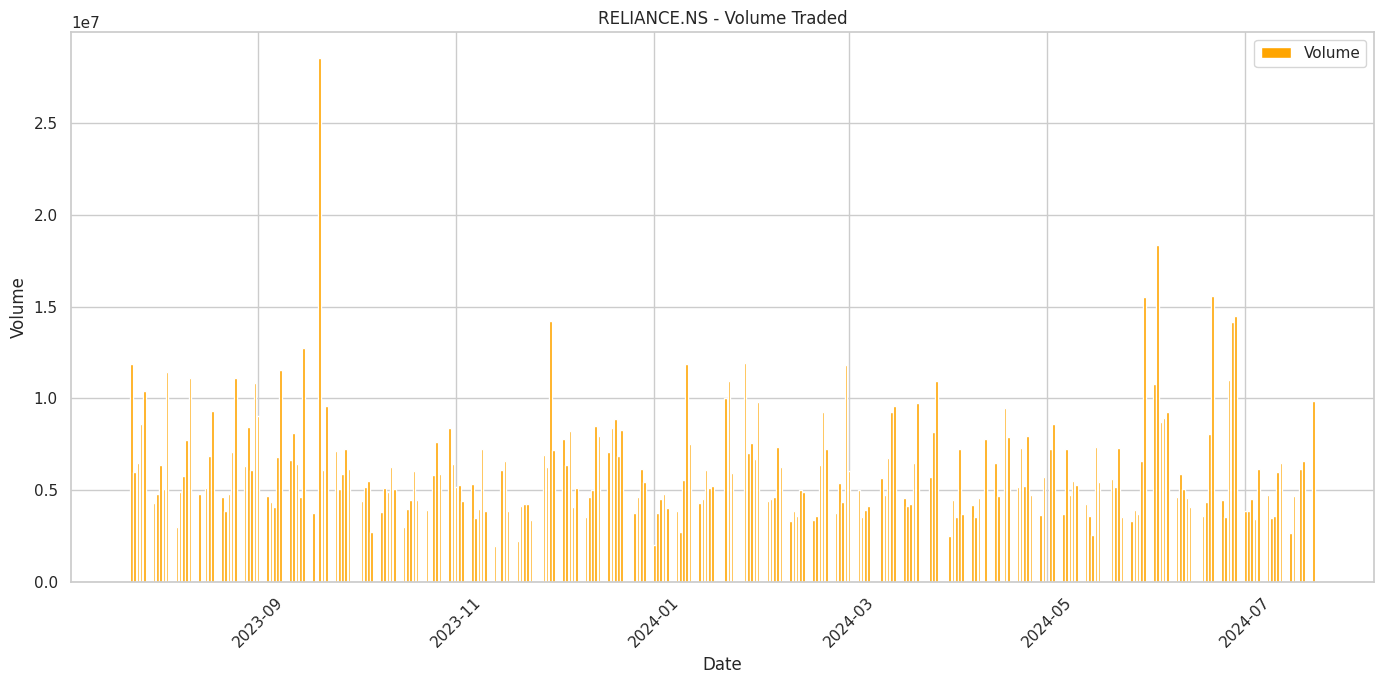

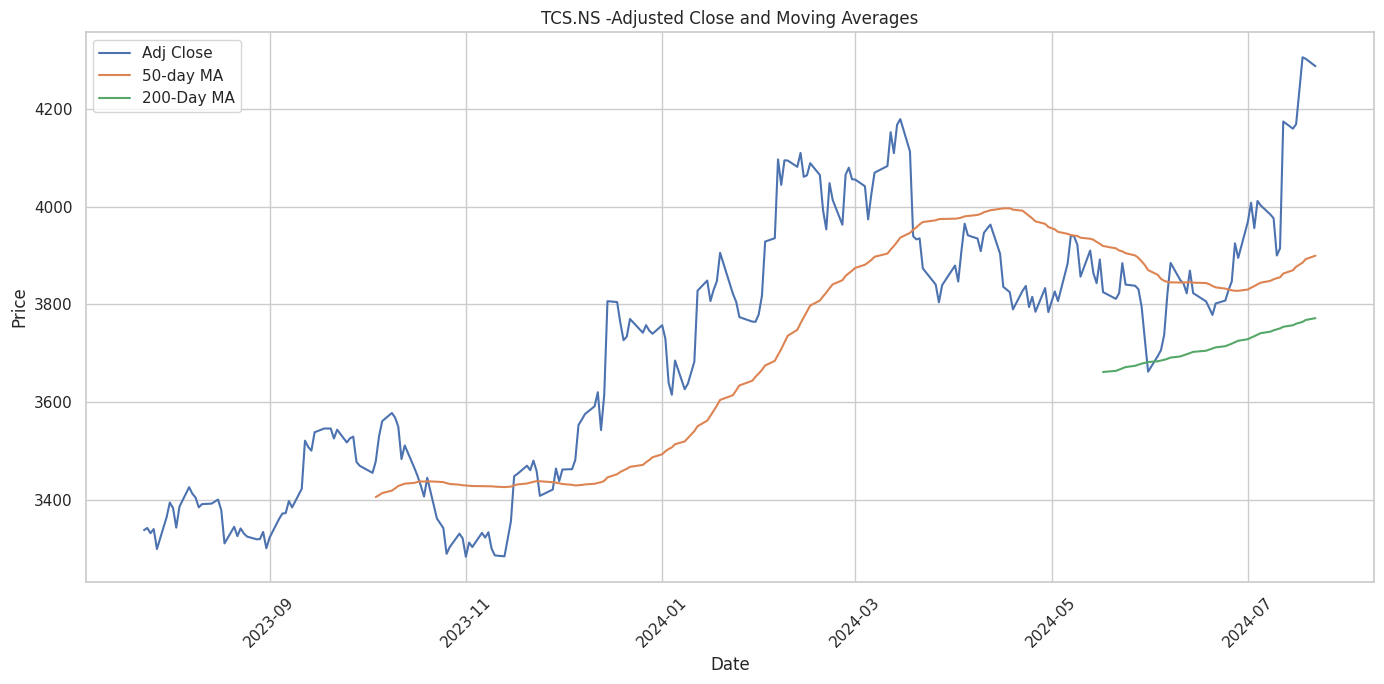

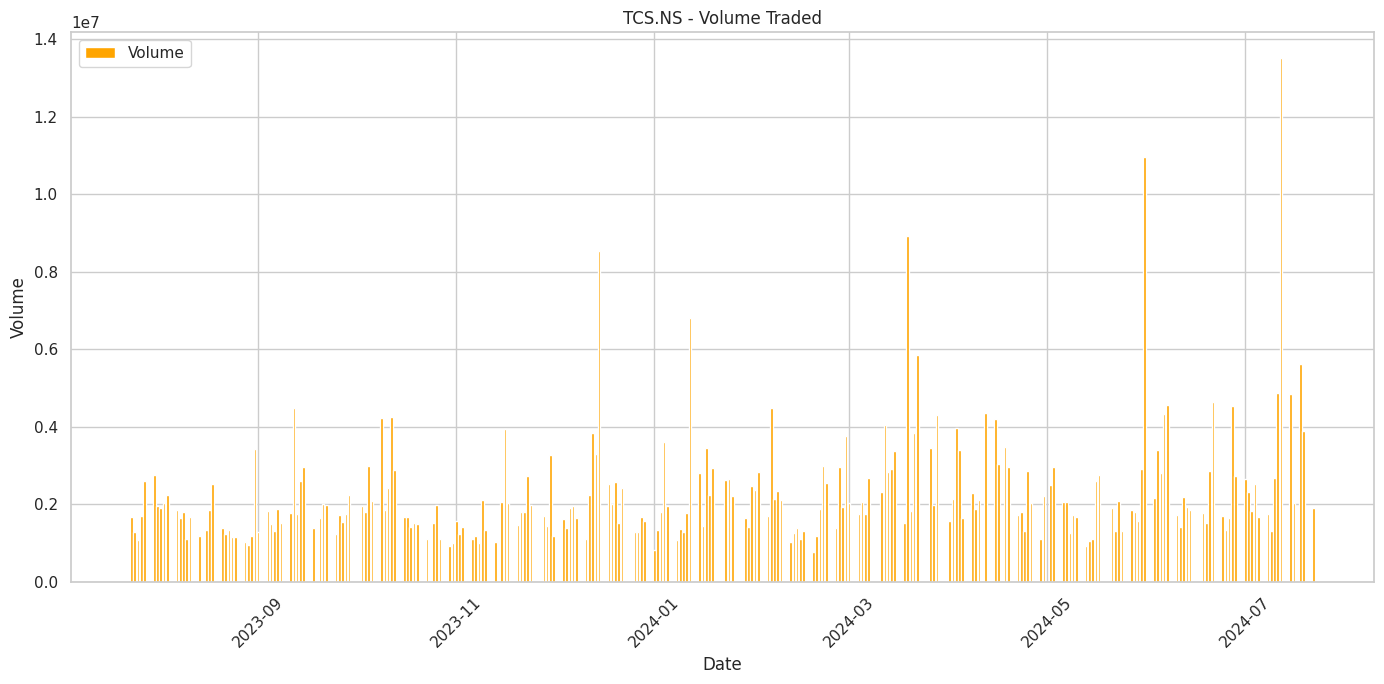

In [ ]:
short_window=50
long_window=200

stock_data.set_index('Date',inplace=True)
unique_tickers=stock_data['Ticker'].unique()

for ticker in unique_tickers:
  ticker_data=stock_data[stock_data['Ticker']==ticker].copy()
  ticker_data['50_MA']=ticker_data['Adj Close'].rolling(window=short_window).mean()
  ticker_data['200_MA']=ticker_data['Adj Close'].rolling(window=long_window).mean()

  plt.figure(figsize=(14,7))
  plt.plot(ticker_data.index,ticker_data['Adj Close'],label='Adj Close')
  plt.plot(ticker_data.index,ticker_data['50_MA'],label='50-day MA')
  plt.plot(ticker_data.index,ticker_data['200_MA'],label='200-Day MA')
  plt.title(f'{ticker} -Adjusted Close and Moving Averages')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.legend()
  plt.grid(True)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()


  plt.figure(figsize=(14, 7))
  plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange')
  plt.title(f'{ticker} - Volume Traded')
  plt.xlabel('Date')
  plt.ylabel('Volume')
  plt.legend()
  plt.grid(True)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [ ]:
print(tickers)

['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']


In [ ]:
print(unique_tickers)

['HDFCBANK.NS' 'INFY.NS' 'RELIANCE.NS' 'TCS.NS']


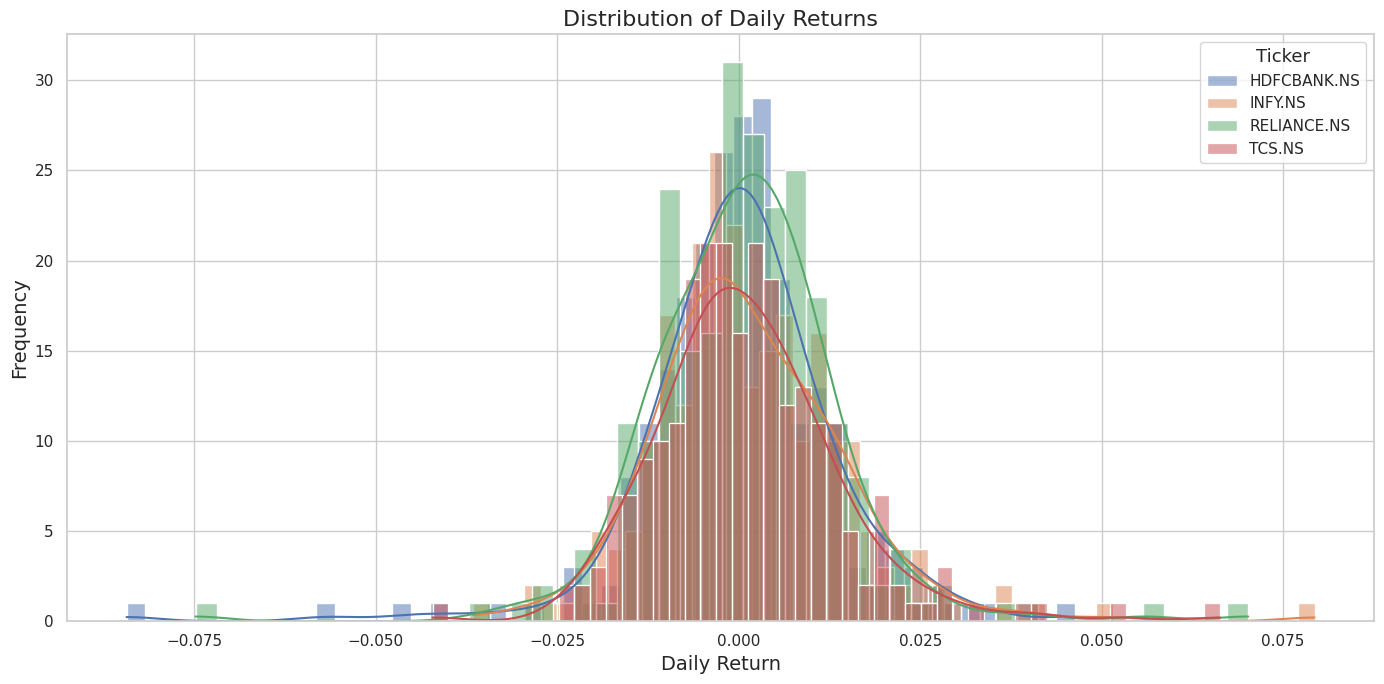

In [ ]:
stock_data['Daily Return']=stock_data.groupby('Ticker')['Adj Close'].pct_change()
plt.figure(figsize=(14,7))
sns.set(style='whitegrid')

for ticker in unique_tickers:
  ticker_data=stock_data[stock_data['Ticker']==ticker]
  sns.histplot(data=ticker_data['Daily Return'].dropna(),bins=50,kde=True,label=ticker,alpha=0.5)

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()




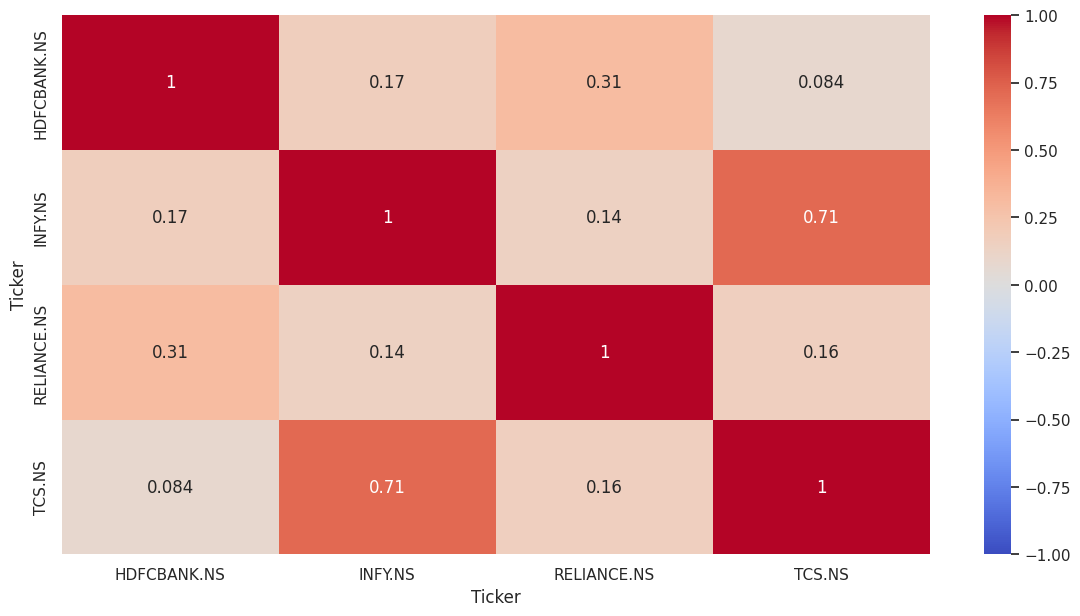

In [ ]:
daily_returns=stock_data.pivot_table(index='Date',columns='Ticker',values='Daily Return',aggfunc='first')
correlation_matrix=daily_returns.corr()

plt.figure(figsize=(14,7))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.show()

In [ ]:
import numpy as np
expected_returns=daily_returns.mean()*252 #annualize the returns
volatality=daily_returns.std()*np.sqrt(252) #annualize the vol

stock_stats=pd.DataFrame({
    'Expected Return':expected_returns,
    'Volatility':volatality
})
stock_stats


,Expected Return,Volatility
Ticker,,
HDFCBANK.NS,0.014453,0.212771
INFY.NS,0.357877,0.212275
RELIANCE.NS,0.221551,0.211342
TCS.NS,0.280804,0.201924


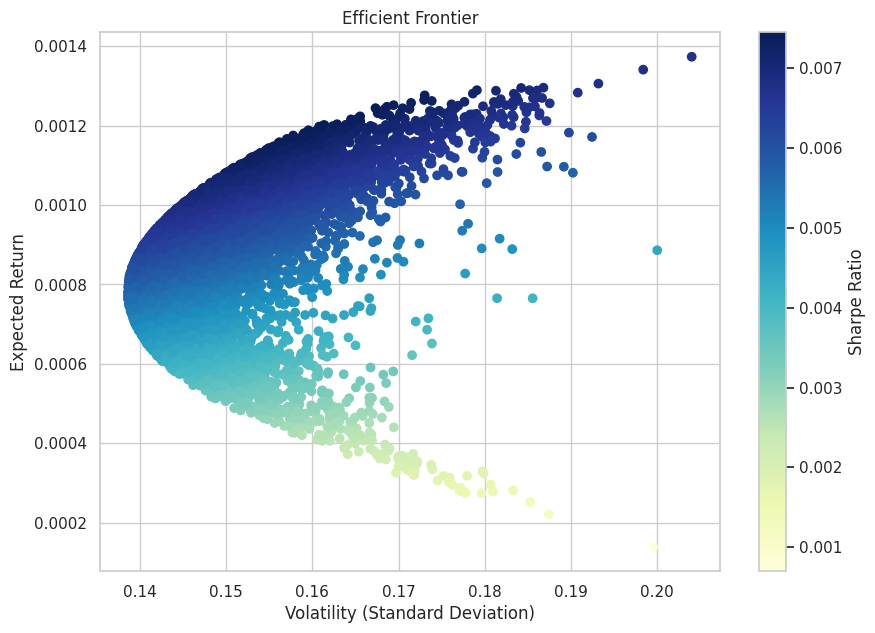

In [ ]:
def portfolio_performance(weights,returns,cov_matrix):
  portfolio_return=np.dot(weights,returns)
  portfolio_volatility=np.sqrt(np.dot(weights.T,np.dot(cov_matrix,weights)))
  return portfolio_return , portfolio_volatility

#number of portfolios to simulate
num_portfolios=10000

#arrays to store the results
results=np.zeros((3, num_portfolios))

#annualized covariance matrix
cov_matrix=daily_returns.cov()*252

np.random.seed(42)


for i in range(num_portfolios):
  weights = np.random.random(len(unique_tickers))
  weights /= np.sum(weights)

  portfolio_return, portfolio_volatility = portfolio_performance(weights, daily_returns.mean(), cov_matrix)

  results[0, i] = portfolio_return
  results[1, i] = portfolio_volatility
  results[2,i]=portfolio_return/portfolio_volatility  # Sharpe Ratio

plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

In [ ]:
#Here’s how to identify the portfolio with the maximum Sharpe ratio:
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]
max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio

(0.0011881839729901995, 0.1595496862713386, 0.007447109428780144)

In [ ]:
max_sharpe_weights = np.zeros(len(unique_tickers))

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    if results[2, i] == max_sharpe_ratio:
        max_sharpe_weights = weights
        break

portfolio_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weight': max_sharpe_weights
})

portfolio_weights_df

,Ticker,Weight
0,HDFCBANK.NS,0.223550
1,INFY.NS,0.293592
2,RELIANCE.NS,0.217741
3,TCS.NS,0.265117
